# Low-Code & Auto-ML with PyCaret

##  Objective

The objective of this notebook will be to tackle a classification problem using the power of PyCaret. We will be exploring the following features and capabilities of PyCaret along the way:

* Getting Data: Learn how to import default datasets from PyCaret repository

* Environment Setup: Learn how to setup an experiment in PyCaret and get started with classification tasks!

* Compare Models: Learn how to compare multiple machine learning models for the given classification task based on model evaluation metrics

* Create Model: Learn how to create specific classifical models, perform stratified cross validation and evaluate classification metrics

* Tune Model: Learn how to automatically tune the hyper-parameters of classification models

* Plot Model: Learn how to analyze model performance using various diagnostic plots

* Finalize Model: Learn how to finalize the best model at the end of the experiment

* Predict Model: Learn how to make predictions on new / unseen data

* Save / Load Model: Learn how to save / load a model for future use

## Install PyCaret

In [3]:

!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
!pip install -U jinja2 # https://github.com/pycaret/pycaret/issues/2591 to bypass import errors later on

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 4.1 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


# Restart the Kernel now

## Enable Interactive Visuals

### If you are using Google Colab, please run the following to enable interactive visuals

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## Binary Classification

#### The objective in this notebook will be to solve a predictive machine learning classification problem. To be more specific, it is going to be binary classification.

#### Binary classification is a supervised machine learning technique where the key objective is to predict a response variable given a set of independent variables (features). The response variable is categorical, having two discrete class labels, such as 1/0, Yes/No, Positive/Negative, Default/Not-Default and so on.

#### A few real world use cases for classification are listed below:

* Fraud detection models to detect if a transaction is fraudulent or not fraudulent
* A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
* Sentiment Analysis -> Positive or Negative

#### PyCaret's classification module (pycaret.classification) is a supervised machine learning module which is used for training, tuning, evaluating and deploying classification models.

#### The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

#### Getting the Data

#### We will be using a popular open-source dataset, called the "Adult" dataset also known as "Census Income" dataset.

#### Key Objective: Predict whether income exceeds $50K/yr based on census data

### Data Retrieval

In [5]:
from pycaret.datasets import get_data
dataset = get_data('income')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
dataset.shape

(32561, 14)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [8]:

dataset.iloc[25:30]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
25,56,Local-gov,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1
26,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0
27,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
28,39,Private,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,0
29,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0


### Split Data into Train-Test Datasets

#### In order to demonstrate the predict_model() function on unseen data, a holdout sample of 15% records has been withheld from the original dataset to be used for predictions.

In [9]:

# create train - test datasets
data_train = dataset.sample(frac=0.85, random_state=42)
data_test = dataset.drop(data_train.index)

# reset row numbers \ indices
data_train.reset_index(inplace=True, drop=True)
data_test.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data_train.shape))
print('Unseen Data For Predictions: ' + str(data_test.shape))

Data for Modeling: (27677, 14)
Unseen Data For Predictions: (4884, 14)


### Understanding the Data

#### Brief descriptions of each column are as follows:

* age: continuous; age of the person

* workclass: categorical; working class of the person;

* Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

* education: categorical; educational qualification of the person;
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* education-num: discrete numeric; educational qualification of the person as a encoded value;

* marital-status: categorical; marital status of the person;

Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* occupation: categorical; occupation of the person;
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* relationship: categorical; relationship information;
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* race: categorical; race information;
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* sex: categorical; gender of the person;
Female, Male.

* capital-gain: continuous; overall capital gain

* capital-loss: continuous; overall capital loss

* hours-per-week: continuous; working hours per week

* native-country: categorical; native country of residence;

United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

* income >50K: Whether the income of the person is more than $50K (1=yes, 0=no) Target Column

In [10]:
data_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,27,Private,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0
1,45,State-gov,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
2,29,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,1
3,30,Private,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
4,29,Self-emp-not-inc,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,0


## PyCaret Environment Setup

#### The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

#### setup() must be called before executing any other function in pycaret.

In [11]:
from pycaret.classification import *

In [12]:
experiment = setup(data=data_train, target='income >50K', session_id=42) 

,Description,Value
0,session_id,42
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(27677, 14)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='income >50K', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('clust

## Comparing all Models

#### Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case).

#### This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

#### We use a standard 5-fold cross validation

In [13]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8689,0.9236,0.6416,0.7739,0.7014,0.6184,0.6230,0.828
gbc,Gradient Boosting Classifier,0.8623,0.9163,0.5726,0.7964,0.6661,0.5823,0.5949,4.050
ada,Ada Boost Classifier,0.8573,0.9077,0.6062,0.7516,0.6709,0.5812,0.5868,0.838
lr,Logistic Regression,0.8480,0.9016,0.5864,0.7276,0.6493,0.5538,0.5591,5.120
rf,Random Forest Classifier,0.8457,0.8869,0.6094,0.7075,0.6546,0.5560,0.5587,3.412
knn,K Neighbors Classifier,0.8393,0.8667,0.6109,0.6855,0.6459,0.5424,0.5440,8.180
lda,Linear Discriminant Analysis,0.8377,0.8891,0.5539,0.7063,0.6208,0.5195,0.5257,1.050
ridge,Ridge Classifier,0.8368,0.0000,0.4969,0.7378,0.5937,0.4965,0.5117,0.074
et,Extra Trees Classifier,0.8267,0.8431,0.5855,0.6559,0.6185,0.5068,0.5083,3.838
dt,Decision Tree Classifier,0.8149,0.7578,0.6094,0.6159,0.6124,0.4909,0.4911,0.192


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


returning best model


In [14]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Create ML Models

create_model is one of the most important functions in PyCaret and is often the starting point or foundation behind most of the PyCaret functionalities.

As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the following two models as our candidate models.

The selections are for illustration purposes only where we pick the best model which is a boosting model and a simple logistic model just to compare:

- Light Gradient Boosting Machine ('lightgbm')
- Logistic Regression ('lr')

In [15]:

models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Create Light Gradient Boosting Model

In [16]:
lgbm = create_model('lightgbm', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8663,0.9205,0.6344,0.7682,0.6949,0.6103,0.6149
1,0.8712,0.9289,0.6462,0.7795,0.7066,0.6251,0.6296
2,0.8650,0.9236,0.6516,0.7528,0.6986,0.6122,0.6148
3,0.8699,0.9209,0.6226,0.7910,0.6968,0.6154,0.6226
4,0.8722,0.9240,0.6534,0.7782,0.7104,0.6292,0.6331
Mean,0.8689,0.9236,0.6416,0.7739,0.7014,0.6184,0.6230
Std,0.0028,0.0030,0.0116,0.0128,0.0060,0.0074,0.0075


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [17]:

lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Create Logistic Regression Model

In [18]:
lr = create_model('lr', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8452,0.8965,0.5935,0.7132,0.6479,0.5497,0.5535
1,0.8529,0.9082,0.5860,0.7466,0.6566,0.5648,0.5715
2,0.8493,0.9034,0.5925,0.7288,0.6536,0.5586,0.5635
3,0.8412,0.8983,0.5645,0.7143,0.6306,0.5313,0.5373
4,0.8516,0.9017,0.5953,0.7354,0.6579,0.5645,0.5696
Mean,0.8480,0.9016,0.5864,0.7276,0.6493,0.5538,0.5591
Std,0.0043,0.0041,0.0114,0.0127,0.0100,0.0125,0.0126


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [19]:
lr


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Tune ML Models

When a model is created using the create_model() function it uses the default hyperparameters to train the model.

In order to tune hyperparameters, the tune_model() function is used.

This function automatically tunes the hyperparameters of a model using Randomized Search on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model.

#### Tune Light Gradient Boosting Model

In [20]:

tuned_lgbm = tune_model(lgbm, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8640,0.9193,0.6323,0.7607,0.6905,0.6043,0.6086
1,0.8751,0.9305,0.6581,0.7866,0.7166,0.6373,0.6415
2,0.8694,0.9243,0.6581,0.7650,0.7075,0.6241,0.6270
3,0.8684,0.9217,0.6312,0.7785,0.6971,0.6142,0.6197
4,0.8738,0.9230,0.6609,0.7792,0.7152,0.6348,0.6384
Mean,0.8701,0.9237,0.6481,0.7740,0.7054,0.6230,0.6270
Std,0.0040,0.0038,0.0134,0.0096,0.0102,0.0124,0.0121


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [21]:
tuned_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### Tune Logistic Regression Model

In [22]:
tuned_lr = tune_model(lr, fold=5,
                      custom_grid = {'C' : [0.01, 0.1, 1, 10, 100],
                                     'penalty' : ['l1', 'l2', 'elasticnet'],
                                     'l1_ratio' : [0.2, 0.3]
                                     })

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8457,0.8969,0.5796,0.7225,0.6432,0.5463,0.5517
1,0.8524,0.9063,0.5763,0.7507,0.6521,0.5604,0.5683
2,0.8511,0.9033,0.5839,0.7408,0.6530,0.5599,0.5664
3,0.8436,0.8992,0.5667,0.7219,0.6349,0.5372,0.5436
4,0.8521,0.9029,0.5845,0.7438,0.6546,0.5622,0.5688
Mean,0.8490,0.9017,0.5782,0.7360,0.6476,0.5532,0.5598
Std,0.0036,0.0033,0.0065,0.0117,0.0075,0.0098,0.0103


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [23]:

tuned_lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Plot ML Model Evaluation Diagnostics

Before model finalization, the plot_model() function can be used to analyze and evaluate the model performance across different aspects such as AUC, confusion_matrix, decision boundary etc.

This function takes a trained model object and returns a plot based on the test / hold-out set.

There are many different plots available, please see the plot_model() docstring for the list of available plots.

#### Confusion Matrix

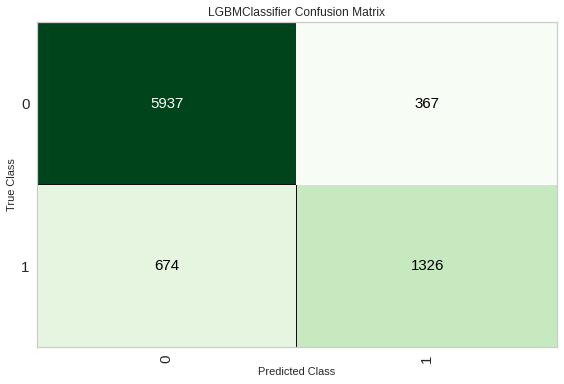

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(tuned_lgbm, plot='confusion_matrix')

#### Feature Importance

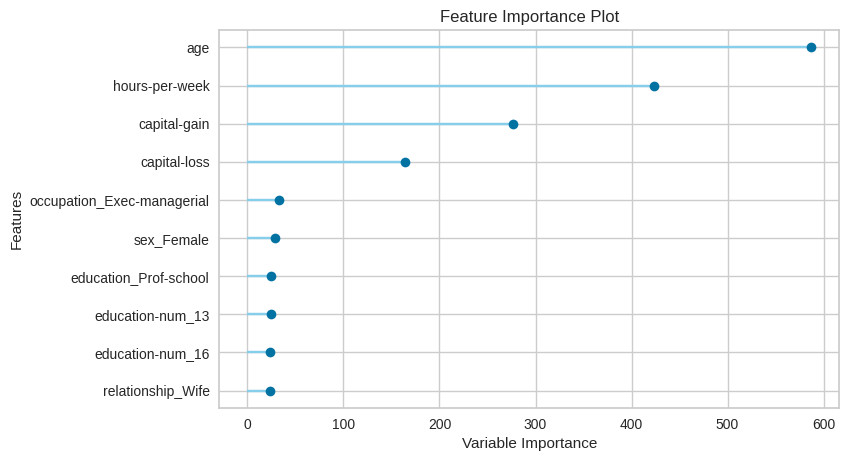

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_lgbm, plot='feature')

In [26]:
evaluate_model(tuned_lgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict on Test / Hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting on the test/hold-out set and reviewing the evaluation metrics.

If you look at the information in Section 6 above, you will see that 30% (8304 samples) of the data has been separated out as test/hold-out sample.

All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. The plot_model shows results on the Test Data.

We can use our trained model stored in the tuned_lgbm variable to get predictions from our test data and use them as necessary

In [27]:
results = predict_model(tuned_lgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8746,0.9309,0.663,0.7832,0.7181,0.6382,0.6419


## Finalize Model for Deployment

Model finalization is the last step in the experiment.

A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. (more on advanced techniques in the next tutorial!).

This workflow will eventually lead you to the best model for use in making predictions on new and unseen data.

The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.



In [28]:
final_lgbm = finalize_model(tuned_lgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_sam

In [29]:
#Final Light Gradient Boosting Model to be used for deployment
final_lgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [30]:
predict_model(final_lgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8886,0.9456,0.702,0.8102,0.7522,0.6808,0.6837


## Predict on unseen / new datasets

The predict_model() function is also used to predict on any new / unseen datasets.

The only difference from section 11 above is that this time we will pass the data_test parameter. data_test is the variable created at the beginning of the tutorial and contains 15% of the original dataset which was never exposed to PyCaret.

In [31]:
new_predictions = predict_model(final_lgbm, data=data_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8731,0.9302,0.6586,0.7866,0.7169,0.6359,0.6401


In [32]:
new_predictions.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,Label,Score
0,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,1,0.9864
1,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1,0,0.5486
2,32,Private,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0,0,0.8336
3,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0,0,0.9974
4,59,Private,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,0,0,0.9475


In [33]:

from sklearn.metrics import classification_report

print(classification_report(new_predictions['income >50K'], new_predictions['Label']))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3692
           1       0.79      0.66      0.72      1192

    accuracy                           0.87      4884
   macro avg       0.84      0.80      0.82      4884
weighted avg       0.87      0.87      0.87      4884



## Saving your ML Model

We have now finished the experiment by finalizing the tuned_lgbm model which is now stored in final_lgbm variable.

We have also used the model stored in final_lgbm to predict data_test.

This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again?

The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [34]:
save_model(final_lgbm,'lgbm_model_20230210')


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=100, n_jobs=-1, num_leaves=30, objective=None,
               random_state=42, reg_alpha=0.001, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), model_name=lgbm_model_20230210, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_fe

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='income >50K', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.8,
                                 importance_type='split', learning_rate=0.2,
                                 max_depth=-1

## Load Saved ML Model for future use

In [35]:
trained_lgbm = load_model('lgbm_model_20230210')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=lgbm_model_20230210, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [36]:
trained_lgbm

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='income >50K', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=0.2,
                                max_depth=-1, min_child_sampl

In [37]:
new_predictions = predict_model(trained_lgbm, data=data_test)
     

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='income >50K', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_s...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learnin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8731,0.9302,0.6586,0.7866,0.7169,0.6359,0.6401


In [38]:
new_predictions.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K,Label,Score
0,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1,1,0.9864
1,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1,0,0.5486
2,32,Private,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,0,0,0.8336
3,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,0,0,0.9974
4,59,Private,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,0,0,0.9475


In [39]:

print(classification_report(new_predictions['income >50K'], new_predictions['Label']))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3692
           1       0.79      0.66      0.72      1192

    accuracy                           0.87      4884
   macro avg       0.84      0.80      0.82      4884
weighted avg       0.87      0.87      0.87      4884

